   **Batch : ML C36 - Balakumar S, Roshan C**

## Problem Statement 

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, your task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

### Neccessary Library

In [1]:
import pandas as pd
import numpy as np

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Read Data

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)

Train Data Shape:  (69999, 172)
Test Data Shape:  (30000, 171)


In [4]:
train_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [5]:
train_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,07-10-2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,06-12-2014,07-10-2014,8/26/2014,0,0,0,NaN,07-08-2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,N

### Data Preprocessing

**Drop Zero variance Columns**

In [6]:
#dropping columns which has no variance and dropping id column.
#'id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
#'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_data_6',
#'date_of_last_rech_data_7', 'date_of_last_rech_data_8'

#'total_rech_data_6', 'total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8',
#'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
#'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
#                'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8',
#                'fb_user_6','fb_user_7', 'fb_user_8'

train_data.drop(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_data_6',
'date_of_last_rech_data_7', 'date_of_last_rech_data_8' ], axis = 1, inplace=True)

test_data.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_data_6',
'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis = 1, inplace=True)


**Missing Value Imputation**

In [7]:
train_data['date_of_last_rech_6'].fillna('06-15-2014', inplace=True)
test_data['date_of_last_rech_6'].fillna('06-15-2014', inplace=True)

train_data['date_of_last_rech_7'].fillna('07-15-2014', inplace=True)
test_data['date_of_last_rech_7'].fillna('07-15-2014', inplace=True)

train_data['date_of_last_rech_8'].fillna('08-15-2014', inplace=True)
test_data['date_of_last_rech_8'].fillna('08-15-2014', inplace=True)

**Derive features from date variable**

In [8]:
#print(pd.to_datetime(train_data['date_of_last_rech_6']).dt.day)

train_data['date_of_last_rech_6'] =  pd.to_datetime(train_data['date_of_last_rech_6']).dt.day
test_data['date_of_last_rech_6'] =  pd.to_datetime(test_data['date_of_last_rech_6']).dt.day

train_data['date_of_last_rech_7'] =  pd.to_datetime(train_data['date_of_last_rech_7']).dt.day
test_data['date_of_last_rech_7'] =  pd.to_datetime(test_data['date_of_last_rech_7']).dt.day

train_data['date_of_last_rech_8'] =  pd.to_datetime(train_data['date_of_last_rech_8']).dt.day
test_data['date_of_last_rech_8'] =  pd.to_datetime(test_data['date_of_last_rech_8']).dt.day


In [9]:
test_data.isnull().sum()

id                         0
arpu_6                     0
arpu_7                     0
arpu_8                     0
onnet_mou_6             1169
onnet_mou_7             1172
onnet_mou_8             1675
offnet_mou_6            1169
offnet_mou_7            1172
offnet_mou_8            1675
roam_ic_mou_6           1169
roam_ic_mou_7           1172
roam_ic_mou_8           1675
roam_og_mou_6           1169
roam_og_mou_7           1172
roam_og_mou_8           1675
loc_og_t2t_mou_6        1169
loc_og_t2t_mou_7        1172
loc_og_t2t_mou_8        1675
loc_og_t2m_mou_6        1169
loc_og_t2m_mou_7        1172
loc_og_t2m_mou_8        1675
loc_og_t2f_mou_6        1169
loc_og_t2f_mou_7        1172
loc_og_t2f_mou_8        1675
loc_og_t2c_mou_6        1169
loc_og_t2c_mou_7        1172
loc_og_t2c_mou_8        1675
loc_og_mou_6            1169
loc_og_mou_7            1172
loc_og_mou_8            1675
std_og_t2t_mou_6        1169
std_og_t2t_mou_7        1172
std_og_t2t_mou_8        1675
std_og_t2m_mou

In [10]:
train_data.isnull().sum()

arpu_6                     0
arpu_7                     0
arpu_8                     0
onnet_mou_6             2768
onnet_mou_7             2687
onnet_mou_8             3703
offnet_mou_6            2768
offnet_mou_7            2687
offnet_mou_8            3703
roam_ic_mou_6           2768
roam_ic_mou_7           2687
roam_ic_mou_8           3703
roam_og_mou_6           2768
roam_og_mou_7           2687
roam_og_mou_8           3703
loc_og_t2t_mou_6        2768
loc_og_t2t_mou_7        2687
loc_og_t2t_mou_8        3703
loc_og_t2m_mou_6        2768
loc_og_t2m_mou_7        2687
loc_og_t2m_mou_8        3703
loc_og_t2f_mou_6        2768
loc_og_t2f_mou_7        2687
loc_og_t2f_mou_8        3703
loc_og_t2c_mou_6        2768
loc_og_t2c_mou_7        2687
loc_og_t2c_mou_8        3703
loc_og_mou_6            2768
loc_og_mou_7            2687
loc_og_mou_8            3703
std_og_t2t_mou_6        2768
std_og_t2t_mou_7        2687
std_og_t2t_mou_8        3703
std_og_t2m_mou_6        2768
std_og_t2m_mou

**Missing Value Imputation II**

In [11]:
#impute missing values
train_data['total_rech_data_6'].fillna(0, inplace=True)
train_data['total_rech_data_7'].fillna(0, inplace=True)
train_data['total_rech_data_8'].fillna(0, inplace=True)
train_data['max_rech_data_6'].fillna(0, inplace=True)
train_data['max_rech_data_7'].fillna(0, inplace=True)
train_data['max_rech_data_8'].fillna(0, inplace=True)

train_data['count_rech_2g_6'].fillna(0, inplace=True)
train_data['count_rech_2g_7'].fillna(0, inplace=True)
train_data['count_rech_2g_8'].fillna(0, inplace=True)

train_data['count_rech_3g_6'].fillna(0, inplace=True)
train_data['count_rech_3g_7'].fillna(0, inplace=True)
train_data['count_rech_3g_8'].fillna(0, inplace=True)

train_data['av_rech_amt_data_6'].fillna(0, inplace=True)
train_data['av_rech_amt_data_7'].fillna(0, inplace=True)
train_data['av_rech_amt_data_8'].fillna(0, inplace=True)

train_data['arpu_3g_6'].fillna(0, inplace=True)
train_data['arpu_3g_7'].fillna(0, inplace=True)
train_data['arpu_3g_8'].fillna(0, inplace=True)

train_data['arpu_2g_6'].fillna(0, inplace=True)
train_data['arpu_2g_7'].fillna(0, inplace=True)
train_data['arpu_2g_8'].fillna(0, inplace=True)

train_data['night_pck_user_6'].fillna(0, inplace=True)
train_data['night_pck_user_7'].fillna(0, inplace=True)
train_data['night_pck_user_8'].fillna(0, inplace=True)

train_data['fb_user_6'].fillna(0, inplace=True)
train_data['fb_user_7'].fillna(0, inplace=True)
train_data['fb_user_8'].fillna(0, inplace=True)

In [12]:
#impute missing values
test_data['total_rech_data_6'].fillna(0, inplace=True)
test_data['total_rech_data_7'].fillna(0, inplace=True)
test_data['total_rech_data_8'].fillna(0, inplace=True)
test_data['max_rech_data_6'].fillna(0, inplace=True)
test_data['max_rech_data_7'].fillna(0, inplace=True)
test_data['max_rech_data_8'].fillna(0, inplace=True)

test_data['count_rech_2g_6'].fillna(0, inplace=True)
test_data['count_rech_2g_7'].fillna(0, inplace=True)
test_data['count_rech_2g_8'].fillna(0, inplace=True)

test_data['count_rech_3g_6'].fillna(0, inplace=True)
test_data['count_rech_3g_7'].fillna(0, inplace=True)
test_data['count_rech_3g_8'].fillna(0, inplace=True)

test_data['av_rech_amt_data_6'].fillna(0, inplace=True)
test_data['av_rech_amt_data_7'].fillna(0, inplace=True)
test_data['av_rech_amt_data_8'].fillna(0, inplace=True)

test_data['arpu_3g_6'].fillna(0, inplace=True)
test_data['arpu_3g_7'].fillna(0, inplace=True)
test_data['arpu_3g_8'].fillna(0, inplace=True)

test_data['arpu_2g_6'].fillna(0, inplace=True)
test_data['arpu_2g_7'].fillna(0, inplace=True)
test_data['arpu_2g_8'].fillna(0, inplace=True)

test_data['night_pck_user_6'].fillna(0, inplace=True)
test_data['night_pck_user_7'].fillna(0, inplace=True)
test_data['night_pck_user_8'].fillna(0, inplace=True)

test_data['fb_user_6'].fillna(0, inplace=True)
test_data['fb_user_7'].fillna(0, inplace=True)
test_data['fb_user_8'].fillna(0, inplace=True)

In [13]:
train_data.isnull().sum()

arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6            2768
onnet_mou_7            2687
onnet_mou_8            3703
offnet_mou_6           2768
offnet_mou_7           2687
offnet_mou_8           3703
roam_ic_mou_6          2768
roam_ic_mou_7          2687
roam_ic_mou_8          3703
roam_og_mou_6          2768
roam_og_mou_7          2687
roam_og_mou_8          3703
loc_og_t2t_mou_6       2768
loc_og_t2t_mou_7       2687
loc_og_t2t_mou_8       3703
loc_og_t2m_mou_6       2768
loc_og_t2m_mou_7       2687
loc_og_t2m_mou_8       3703
loc_og_t2f_mou_6       2768
loc_og_t2f_mou_7       2687
loc_og_t2f_mou_8       3703
loc_og_t2c_mou_6       2768
loc_og_t2c_mou_7       2687
loc_og_t2c_mou_8       3703
loc_og_mou_6           2768
loc_og_mou_7           2687
loc_og_mou_8           3703
std_og_t2t_mou_6       2768
std_og_t2t_mou_7       2687
std_og_t2t_mou_8       3703
std_og_t2m_mou_6       2768
std_og_t2m_mou_7       2687
std_og_t2m_mou_8    

In [14]:
test_data.isnull().sum()

id                        0
arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6            1169
onnet_mou_7            1172
onnet_mou_8            1675
offnet_mou_6           1169
offnet_mou_7           1172
offnet_mou_8           1675
roam_ic_mou_6          1169
roam_ic_mou_7          1172
roam_ic_mou_8          1675
roam_og_mou_6          1169
roam_og_mou_7          1172
roam_og_mou_8          1675
loc_og_t2t_mou_6       1169
loc_og_t2t_mou_7       1172
loc_og_t2t_mou_8       1675
loc_og_t2m_mou_6       1169
loc_og_t2m_mou_7       1172
loc_og_t2m_mou_8       1675
loc_og_t2f_mou_6       1169
loc_og_t2f_mou_7       1172
loc_og_t2f_mou_8       1675
loc_og_t2c_mou_6       1169
loc_og_t2c_mou_7       1172
loc_og_t2c_mou_8       1675
loc_og_mou_6           1169
loc_og_mou_7           1172
loc_og_mou_8           1675
std_og_t2t_mou_6       1169
std_og_t2t_mou_7       1172
std_og_t2t_mou_8       1675
std_og_t2m_mou_6       1169
std_og_t2m_mou_7    

### High value customers

He or She should have spend equal or more than 65 percentile of average recharge amount in first two months. 
The telecom domain, first two months here can be referred as good phase of the customer.

In [15]:
#this shows high imbalance in data set, where nearly 90% of customers are non-churn and only 10% are churn.
#we may use SMOTE or other techiques to overcome this.
train_data['churn_probability'].value_counts()/len(train_data)*100

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64

In [16]:
# Splitting train data into train and test parts. To carry out building and evaluating the model.

X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [17]:
print(X.shape)
print(y.shape)

(69999, 160)
(69999,)


In [18]:
train_data.isnull().sum()

arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6            2768
onnet_mou_7            2687
onnet_mou_8            3703
offnet_mou_6           2768
offnet_mou_7           2687
offnet_mou_8           3703
roam_ic_mou_6          2768
roam_ic_mou_7          2687
roam_ic_mou_8          3703
roam_og_mou_6          2768
roam_og_mou_7          2687
roam_og_mou_8          3703
loc_og_t2t_mou_6       2768
loc_og_t2t_mou_7       2687
loc_og_t2t_mou_8       3703
loc_og_t2m_mou_6       2768
loc_og_t2m_mou_7       2687
loc_og_t2m_mou_8       3703
loc_og_t2f_mou_6       2768
loc_og_t2f_mou_7       2687
loc_og_t2f_mou_8       3703
loc_og_t2c_mou_6       2768
loc_og_t2c_mou_7       2687
loc_og_t2c_mou_8       3703
loc_og_mou_6           2768
loc_og_mou_7           2687
loc_og_mou_8           3703
std_og_t2t_mou_6       2768
std_og_t2t_mou_7       2687
std_og_t2t_mou_8       3703
std_og_t2m_mou_6       2768
std_og_t2m_mou_7       2687
std_og_t2m_mou_8    

### Split Data into Test and Train

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train['onnet_mou_6'].fillna(value=X_train['onnet_mou_6'].mean(), inplace=True)
X_train['onnet_mou_7'].fillna(value=X_train['onnet_mou_7'].mean(), inplace=True)
X_train['onnet_mou_8'].fillna(value=X_train['onnet_mou_8'].mean(), inplace=True)
X_train['offnet_mou_6'].fillna(value=X_train['offnet_mou_6'].mean(), inplace=True)
X_train['offnet_mou_7'].fillna(value=X_train['offnet_mou_7'].mean(), inplace=True)
X_train['offnet_mou_8'].fillna(value=X_train['offnet_mou_8'].mean(), inplace=True)
X_train['roam_ic_mou_6'].fillna(value=X_train['roam_ic_mou_6'].mean(), inplace=True)
X_train['roam_ic_mou_7'].fillna(value=X_train['roam_ic_mou_7'].mean(), inplace=True)

X_train['roam_ic_mou_8'].fillna(value=X_train['roam_ic_mou_8'].mean(), inplace=True)
X_train['roam_og_mou_6'].fillna(value=X_train['roam_og_mou_6'].mean(), inplace=True)
X_train['roam_og_mou_7'].fillna(value=X_train['roam_og_mou_7'].mean(), inplace=True)
X_train['roam_og_mou_8'].fillna(value=X_train['roam_og_mou_8'].mean(), inplace=True)
X_train['loc_og_t2t_mou_6'].fillna(value=X_train['loc_og_t2t_mou_6'].mean(), inplace=True)
X_train['loc_og_t2t_mou_7'].fillna(value=X_train['loc_og_t2t_mou_7'].mean(), inplace=True)
X_train['loc_og_t2t_mou_8'].fillna(value=X_train['loc_og_t2t_mou_8'].mean(), inplace=True)
X_train['loc_og_t2m_mou_6'].fillna(value=X_train['loc_og_t2m_mou_6'].mean(), inplace=True)
X_train['loc_og_t2m_mou_7'].fillna(value=X_train['loc_og_t2m_mou_7'].mean(), inplace=True)
X_train['loc_og_t2m_mou_8'].fillna(value=X_train['loc_og_t2m_mou_8'].mean(), inplace=True)

X_train['loc_og_t2f_mou_6'].fillna(value=X_train['loc_og_t2f_mou_6'].mean(), inplace=True)
X_train['loc_og_t2f_mou_7'].fillna(value=X_train['loc_og_t2f_mou_7'].mean(), inplace=True)
X_train['loc_og_t2f_mou_8'].fillna(value=X_train['loc_og_t2f_mou_8'].mean(), inplace=True)
X_train['loc_og_t2c_mou_6'].fillna(value=X_train['loc_og_t2c_mou_6'].mean(), inplace=True)
X_train['loc_og_t2c_mou_7'].fillna(value=X_train['loc_og_t2c_mou_7'].mean(), inplace=True)
X_train['loc_og_t2c_mou_8'].fillna(value=X_train['loc_og_t2c_mou_8'].mean(), inplace=True)
X_train['loc_og_mou_6'].fillna(value=X_train['loc_og_mou_6'].mean(), inplace=True)
X_train['loc_og_mou_7'].fillna(value=X_train['loc_og_mou_7'].mean(), inplace=True)
X_train['loc_og_mou_8'].fillna(value=X_train['loc_og_mou_8'].mean(), inplace=True)
X_train['std_og_t2t_mou_6'].fillna(value=X_train['std_og_t2t_mou_6'].mean(), inplace=True)
X_train['std_og_t2t_mou_7'].fillna(value=X_train['std_og_t2t_mou_7'].mean(), inplace=True)
X_train['std_og_t2t_mou_8'].fillna(value=X_train['std_og_t2t_mou_8'].mean(), inplace=True)
X_train['std_og_t2m_mou_6'].fillna(value=X_train['std_og_t2m_mou_6'].mean(), inplace=True)
X_train['std_og_t2m_mou_7'].fillna(value=X_train['std_og_t2m_mou_7'].mean(), inplace=True)

X_train['std_og_t2m_mou_8'].fillna(value=X_train['std_og_t2m_mou_8'].mean(), inplace=True)
X_train['std_og_t2f_mou_6'].fillna(value=X_train['std_og_t2f_mou_6'].mean(), inplace=True)
X_train['std_og_t2f_mou_7'].fillna(value=X_train['std_og_t2f_mou_7'].mean(), inplace=True)
X_train['std_og_t2f_mou_8'].fillna(value=X_train['std_og_t2f_mou_8'].mean(), inplace=True)
X_train['std_og_t2c_mou_6'].fillna(value=X_train['std_og_t2c_mou_6'].mean(), inplace=True)
X_train['std_og_t2c_mou_7'].fillna(value=X_train['std_og_t2c_mou_7'].mean(), inplace=True)
X_train['std_og_t2c_mou_8'].fillna(value=X_train['std_og_t2c_mou_8'].mean(), inplace=True)
X_train['std_og_mou_6'].fillna(value=X_train['std_og_mou_6'].mean(), inplace=True)
X_train['std_og_mou_7'].fillna(value=X_train['std_og_mou_7'].mean(), inplace=True)
X_train['std_og_mou_8'].fillna(value=X_train['std_og_mou_8'].mean(), inplace=True)
X_train['isd_og_mou_6'].fillna(value=X_train['isd_og_mou_6'].mean(), inplace=True)
X_train['isd_og_mou_7'].fillna(value=X_train['isd_og_mou_7'].mean(), inplace=True)
X_train['isd_og_mou_8'].fillna(value=X_train['isd_og_mou_8'].mean(), inplace=True)
X_train['spl_og_mou_6'].fillna(value=X_train['spl_og_mou_6'].mean(), inplace=True)
X_train['spl_og_mou_7'].fillna(value=X_train['spl_og_mou_7'].mean(), inplace=True)
X_train['spl_og_mou_8'].fillna(value=X_train['spl_og_mou_8'].mean(), inplace=True)

X_train['og_others_6'].fillna(value=X_train['og_others_6'].mean(), inplace=True)
X_train['og_others_7'].fillna(value=X_train['og_others_7'].mean(), inplace=True)
X_train['og_others_8'].fillna(value=X_train['og_others_8'].mean(), inplace=True)
X_train['loc_ic_t2t_mou_6'].fillna(value=X_train['loc_ic_t2t_mou_6'].mean(), inplace=True)
X_train['loc_ic_t2t_mou_7'].fillna(value=X_train['loc_ic_t2t_mou_7'].mean(), inplace=True)
X_train['loc_ic_t2t_mou_8'].fillna(value=X_train['loc_ic_t2t_mou_8'].mean(), inplace=True)

X_train['loc_ic_t2m_mou_6'].fillna(value=X_train['loc_ic_t2m_mou_6'].mean(), inplace=True)
X_train['loc_ic_t2m_mou_7'].fillna(value=X_train['loc_ic_t2m_mou_7'].mean(), inplace=True)
X_train['loc_ic_t2m_mou_8'].fillna(value=X_train['loc_ic_t2m_mou_8'].mean(), inplace=True)

X_train['loc_ic_t2f_mou_6'].fillna(value=X_train['loc_ic_t2f_mou_6'].mean(), inplace=True)
X_train['loc_ic_t2f_mou_7'].fillna(value=X_train['loc_ic_t2f_mou_7'].mean(), inplace=True)
X_train['loc_ic_t2f_mou_8'].fillna(value=X_train['loc_ic_t2f_mou_8'].mean(), inplace=True)
X_train['loc_ic_mou_6'].fillna(value=X_train['loc_ic_mou_6'].mean(), inplace=True)
X_train['loc_ic_mou_7'].fillna(value=X_train['loc_ic_mou_7'].mean(), inplace=True)
X_train['loc_ic_mou_8'].fillna(value=X_train['loc_ic_mou_8'].mean(), inplace=True)
X_train['std_ic_t2t_mou_6'].fillna(value=X_train['std_ic_t2t_mou_6'].mean(), inplace=True)
X_train['std_ic_t2t_mou_7'].fillna(value=X_train['std_ic_t2t_mou_7'].mean(), inplace=True)
X_train['std_ic_t2t_mou_8'].fillna(value=X_train['std_ic_t2t_mou_8'].mean(), inplace=True)
X_train['std_ic_t2m_mou_6'].fillna(value=X_train['std_ic_t2m_mou_6'].mean(), inplace=True)
X_train['std_ic_t2m_mou_7'].fillna(value=X_train['std_ic_t2m_mou_7'].mean(), inplace=True)
X_train['std_ic_t2m_mou_8'].fillna(value=X_train['std_ic_t2m_mou_8'].mean(), inplace=True)
X_train['std_ic_t2f_mou_6'].fillna(value=X_train['std_ic_t2f_mou_6'].mean(), inplace=True)
X_train['std_ic_t2f_mou_7'].fillna(value=X_train['std_ic_t2f_mou_7'].mean(), inplace=True)
X_train['std_ic_t2f_mou_8'].fillna(value=X_train['std_ic_t2f_mou_8'].mean(), inplace=True)
X_train['std_ic_t2o_mou_6'].fillna(value=X_train['std_ic_t2o_mou_6'].mean(), inplace=True)
X_train['std_ic_t2o_mou_7'].fillna(value=X_train['std_ic_t2o_mou_7'].mean(), inplace=True)
X_train['std_ic_t2o_mou_8'].fillna(value=X_train['std_ic_t2o_mou_8'].mean(), inplace=True)
X_train['std_ic_mou_6'].fillna(value=X_train['std_ic_mou_6'].mean(), inplace=True)
X_train['std_ic_mou_7'].fillna(value=X_train['std_ic_mou_7'].mean(), inplace=True)
X_train['std_ic_mou_8'].fillna(value=X_train['std_ic_mou_8'].mean(), inplace=True)
X_train['spl_ic_mou_6'].fillna(value=X_train['spl_ic_mou_6'].mean(), inplace=True)
X_train['spl_ic_mou_7'].fillna(value=X_train['spl_ic_mou_7'].mean(), inplace=True)
X_train['spl_ic_mou_8'].fillna(value=X_train['spl_ic_mou_8'].mean(), inplace=True)
X_train['isd_ic_mou_6'].fillna(value=X_train['isd_ic_mou_6'].mean(), inplace=True)
X_train['isd_ic_mou_7'].fillna(value=X_train['isd_ic_mou_7'].mean(), inplace=True)
X_train['isd_ic_mou_8'].fillna(value=X_train['isd_ic_mou_8'].mean(), inplace=True)
X_train['ic_others_6'].fillna(value=X_train['ic_others_6'].mean(), inplace=True)
X_train['ic_others_7'].fillna(value=X_train['ic_others_7'].mean(), inplace=True)
X_train['ic_others_8'].fillna(value=X_train['ic_others_8'].mean(), inplace=True)


X_test['onnet_mou_6'].fillna(value=X_test['onnet_mou_6'].mean(), inplace=True)
X_test['onnet_mou_7'].fillna(value=X_test['onnet_mou_7'].mean(), inplace=True)
X_test['onnet_mou_8'].fillna(value=X_test['onnet_mou_8'].mean(), inplace=True)
X_test['offnet_mou_6'].fillna(value=X_test['offnet_mou_6'].mean(), inplace=True)
X_test['offnet_mou_7'].fillna(value=X_test['offnet_mou_7'].mean(), inplace=True)
X_test['offnet_mou_8'].fillna(value=X_test['offnet_mou_8'].mean(), inplace=True)
X_test['roam_ic_mou_6'].fillna(value=X_test['roam_ic_mou_6'].mean(), inplace=True)
X_test['roam_ic_mou_7'].fillna(value=X_test['roam_ic_mou_7'].mean(), inplace=True)

X_test['roam_ic_mou_8'].fillna(value=X_test['roam_ic_mou_8'].mean(), inplace=True)
X_test['roam_og_mou_6'].fillna(value=X_test['roam_og_mou_6'].mean(), inplace=True)
X_test['roam_og_mou_7'].fillna(value=X_test['roam_og_mou_7'].mean(), inplace=True)
X_test['roam_og_mou_8'].fillna(value=X_test['roam_og_mou_8'].mean(), inplace=True)
X_test['loc_og_t2t_mou_6'].fillna(value=X_test['loc_og_t2t_mou_6'].mean(), inplace=True)
X_test['loc_og_t2t_mou_7'].fillna(value=X_test['loc_og_t2t_mou_7'].mean(), inplace=True)
X_test['loc_og_t2t_mou_8'].fillna(value=X_test['loc_og_t2t_mou_8'].mean(), inplace=True)
X_test['loc_og_t2m_mou_6'].fillna(value=X_test['loc_og_t2m_mou_6'].mean(), inplace=True)
X_test['loc_og_t2m_mou_7'].fillna(value=X_test['loc_og_t2m_mou_7'].mean(), inplace=True)
X_test['loc_og_t2m_mou_8'].fillna(value=X_test['loc_og_t2m_mou_8'].mean(), inplace=True)

X_test['loc_og_t2f_mou_6'].fillna(value=X_test['loc_og_t2f_mou_6'].mean(), inplace=True)
X_test['loc_og_t2f_mou_7'].fillna(value=X_test['loc_og_t2f_mou_7'].mean(), inplace=True)
X_test['loc_og_t2f_mou_8'].fillna(value=X_test['loc_og_t2f_mou_8'].mean(), inplace=True)
X_test['loc_og_t2c_mou_6'].fillna(value=X_test['loc_og_t2c_mou_6'].mean(), inplace=True)
X_test['loc_og_t2c_mou_7'].fillna(value=X_test['loc_og_t2c_mou_7'].mean(), inplace=True)
X_test['loc_og_t2c_mou_8'].fillna(value=X_test['loc_og_t2c_mou_8'].mean(), inplace=True)
X_test['loc_og_mou_6'].fillna(value=X_test['loc_og_mou_6'].mean(), inplace=True)
X_test['loc_og_mou_7'].fillna(value=X_test['loc_og_mou_7'].mean(), inplace=True)
X_test['loc_og_mou_8'].fillna(value=X_test['loc_og_mou_8'].mean(), inplace=True)
X_test['std_og_t2t_mou_6'].fillna(value=X_test['std_og_t2t_mou_6'].mean(), inplace=True)
X_test['std_og_t2t_mou_7'].fillna(value=X_test['std_og_t2t_mou_7'].mean(), inplace=True)
X_test['std_og_t2t_mou_8'].fillna(value=X_test['std_og_t2t_mou_8'].mean(), inplace=True)
X_test['std_og_t2m_mou_6'].fillna(value=X_test['std_og_t2m_mou_6'].mean(), inplace=True)
X_test['std_og_t2m_mou_7'].fillna(value=X_test['std_og_t2m_mou_7'].mean(), inplace=True)

X_test['std_og_t2m_mou_8'].fillna(value=X_test['std_og_t2m_mou_8'].mean(), inplace=True)
X_test['std_og_t2f_mou_6'].fillna(value=X_test['std_og_t2f_mou_6'].mean(), inplace=True)
X_test['std_og_t2f_mou_7'].fillna(value=X_test['std_og_t2f_mou_7'].mean(), inplace=True)
X_test['std_og_t2f_mou_8'].fillna(value=X_test['std_og_t2f_mou_8'].mean(), inplace=True)
X_test['std_og_t2c_mou_6'].fillna(value=X_test['std_og_t2c_mou_6'].mean(), inplace=True)
X_test['std_og_t2c_mou_7'].fillna(value=X_test['std_og_t2c_mou_7'].mean(), inplace=True)
X_test['std_og_t2c_mou_8'].fillna(value=X_test['std_og_t2c_mou_8'].mean(), inplace=True)
X_test['std_og_mou_6'].fillna(value=X_test['std_og_mou_6'].mean(), inplace=True)
X_test['std_og_mou_7'].fillna(value=X_test['std_og_mou_7'].mean(), inplace=True)
X_test['std_og_mou_8'].fillna(value=X_test['std_og_mou_8'].mean(), inplace=True)
X_test['isd_og_mou_6'].fillna(value=X_test['isd_og_mou_6'].mean(), inplace=True)
X_test['isd_og_mou_7'].fillna(value=X_test['isd_og_mou_7'].mean(), inplace=True)
X_test['isd_og_mou_8'].fillna(value=X_test['isd_og_mou_8'].mean(), inplace=True)
X_test['spl_og_mou_6'].fillna(value=X_test['spl_og_mou_6'].mean(), inplace=True)
X_test['spl_og_mou_7'].fillna(value=X_test['spl_og_mou_7'].mean(), inplace=True)
X_test['spl_og_mou_8'].fillna(value=X_test['spl_og_mou_8'].mean(), inplace=True)

X_test['og_others_6'].fillna(value=X_test['og_others_6'].mean(), inplace=True)
X_test['og_others_7'].fillna(value=X_test['og_others_7'].mean(), inplace=True)
X_test['og_others_8'].fillna(value=X_test['og_others_8'].mean(), inplace=True)
X_test['loc_ic_t2t_mou_6'].fillna(value=X_test['loc_ic_t2t_mou_6'].mean(), inplace=True)
X_test['loc_ic_t2t_mou_7'].fillna(value=X_test['loc_ic_t2t_mou_7'].mean(), inplace=True)
X_test['loc_ic_t2t_mou_8'].fillna(value=X_test['loc_ic_t2t_mou_8'].mean(), inplace=True)

X_test['loc_ic_t2m_mou_6'].fillna(value=X_test['loc_ic_t2m_mou_6'].mean(), inplace=True)
X_test['loc_ic_t2m_mou_7'].fillna(value=X_test['loc_ic_t2m_mou_7'].mean(), inplace=True)
X_test['loc_ic_t2m_mou_8'].fillna(value=X_test['loc_ic_t2m_mou_8'].mean(), inplace=True)

X_test['loc_ic_t2f_mou_6'].fillna(value=X_test['loc_ic_t2f_mou_6'].mean(), inplace=True)
X_test['loc_ic_t2f_mou_7'].fillna(value=X_test['loc_ic_t2f_mou_7'].mean(), inplace=True)
X_test['loc_ic_t2f_mou_8'].fillna(value=X_test['loc_ic_t2f_mou_8'].mean(), inplace=True)
X_test['loc_ic_mou_6'].fillna(value=X_test['loc_ic_mou_6'].mean(), inplace=True)
X_test['loc_ic_mou_7'].fillna(value=X_test['loc_ic_mou_7'].mean(), inplace=True)
X_test['loc_ic_mou_8'].fillna(value=X_test['loc_ic_mou_8'].mean(), inplace=True)
X_test['std_ic_t2t_mou_6'].fillna(value=X_test['std_ic_t2t_mou_6'].mean(), inplace=True)
X_test['std_ic_t2t_mou_7'].fillna(value=X_test['std_ic_t2t_mou_7'].mean(), inplace=True)
X_test['std_ic_t2t_mou_8'].fillna(value=X_test['std_ic_t2t_mou_8'].mean(), inplace=True)
X_test['std_ic_t2m_mou_6'].fillna(value=X_test['std_ic_t2m_mou_6'].mean(), inplace=True)
X_test['std_ic_t2m_mou_7'].fillna(value=X_test['std_ic_t2m_mou_7'].mean(), inplace=True)
X_test['std_ic_t2m_mou_8'].fillna(value=X_test['std_ic_t2m_mou_8'].mean(), inplace=True)
X_test['std_ic_t2f_mou_6'].fillna(value=X_test['std_ic_t2f_mou_6'].mean(), inplace=True)
X_test['std_ic_t2f_mou_7'].fillna(value=X_test['std_ic_t2f_mou_7'].mean(), inplace=True)
X_test['std_ic_t2f_mou_8'].fillna(value=X_test['std_ic_t2f_mou_8'].mean(), inplace=True)
X_test['std_ic_t2o_mou_6'].fillna(value=X_test['std_ic_t2o_mou_6'].mean(), inplace=True)
X_test['std_ic_t2o_mou_7'].fillna(value=X_test['std_ic_t2o_mou_7'].mean(), inplace=True)
X_test['std_ic_t2o_mou_8'].fillna(value=X_test['std_ic_t2o_mou_8'].mean(), inplace=True)
X_test['std_ic_mou_6'].fillna(value=X_test['std_ic_mou_6'].mean(), inplace=True)
X_test['std_ic_mou_7'].fillna(value=X_test['std_ic_mou_7'].mean(), inplace=True)
X_test['std_ic_mou_8'].fillna(value=X_test['std_ic_mou_8'].mean(), inplace=True)
X_test['spl_ic_mou_6'].fillna(value=X_test['spl_ic_mou_6'].mean(), inplace=True)
X_test['spl_ic_mou_7'].fillna(value=X_test['spl_ic_mou_7'].mean(), inplace=True)
X_test['spl_ic_mou_8'].fillna(value=X_test['spl_ic_mou_8'].mean(), inplace=True)
X_test['isd_ic_mou_6'].fillna(value=X_test['isd_ic_mou_6'].mean(), inplace=True)
X_test['isd_ic_mou_7'].fillna(value=X_test['isd_ic_mou_7'].mean(), inplace=True)
X_test['isd_ic_mou_8'].fillna(value=X_test['isd_ic_mou_8'].mean(), inplace=True)
X_test['ic_others_6'].fillna(value=X_test['ic_others_6'].mean(), inplace=True)
X_test['ic_others_7'].fillna(value=X_test['ic_others_7'].mean(), inplace=True)
X_test['ic_others_8'].fillna(value=X_test['ic_others_8'].mean(), inplace=True)

In [21]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)

X_train Shape:  (48999, 160)
y_train Shape:  (48999,)


### Handling Imbalance using Synthetic Data Creation

In [22]:
#sm = SMOTE(random_state = 2, sampling_strategy = 'auto', k_neighbors=9)
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())


over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.35)

steps = [('o', over), ('u', under)]
pipeline = make_pipeline(over, under)

X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)


X_train = X_train_res
y_train = y_train_res

<AxesSubplot:xlabel='churn_probability', ylabel='Count'>

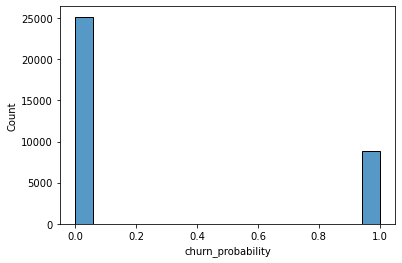

In [23]:
sns.histplot(y_train)

In [24]:
#print('X Train set RES Shape: ', X_train_res.shape)
print('X Test set Shape: ', X_test.shape)
#print('Y Train set RES Shape: ', y_train_res.shape)
print('Y Test set Shape: ', y_test.shape)

X Test set Shape:  (21000, 160)
Y Test set Shape:  (21000,)


In [25]:
print('X Train set Shape: ', X_train.shape)
print('X Test set Shape: ', X_test.shape)
print('Y Train set Shape: ', y_train.shape)
print('Y Test set Shape: ', y_test.shape)

X Train set Shape:  (33958, 160)
X Test set Shape:  (21000, 160)
Y Train set Shape:  (33958,)
Y Test set Shape:  (21000,)


In [26]:
#this shows high imbalance in data set, where nearly 90% of customers are non-churn and only 10% are churn.
#we may use SMOTE or other techiques to overcome this.
train_data['churn_probability'].value_counts()/len(train_data)*100

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64

In [27]:
y_test.head()

57621    0
39559    0
41415    0
47731    0
64801    0
Name: churn_probability, dtype: int64

In [28]:
#there are no missing values in train data set
X_train.isnull().sum()

arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
std_og_t2t_mou_6       0
std_og_t2t_mou_7       0
std_og_t2t_mou_8       0
std_og_t2m_mou_6       0
std_og_t2m_mou_7       0
std_og_t2m_mou_8       0
std_og_t2f_mou_6       0
std_og_t2f_mou_7       0
std_og_t2f_mou_8       0
std_og_t2c_mou_6       0


In [29]:
#there are no missing values in test data set
X_test.isnull().sum()

arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
std_og_t2t_mou_6       0
std_og_t2t_mou_7       0
std_og_t2t_mou_8       0
std_og_t2m_mou_6       0
std_og_t2m_mou_7       0
std_og_t2m_mou_8       0
std_og_t2f_mou_6       0
std_og_t2f_mou_7       0
std_og_t2f_mou_8       0
std_og_t2c_mou_6       0


In [30]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,59.568,18.913,73.636,1.01,0.00,0.00,30.94,9.01,44.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.88,7.99,21.88,0.00,0.00,0.00,0.0,0.0,0.0,11.88,7.99,21.88,1.01,0.00,0.00,16.84,1.01,19.44,2.21,0.00,0.0,0.0,0.0,0.0,20.08,1.01,19.44,0.0,0.0,0.0,0.00,0.0,4.23,0.0,0.0,0.0,31.96,9.01,45.56,0.93,0.00,0.00,17.71,24.16,17.24,8.56,16.46,0.68,27.21,40.63,17.93,1.96,0.00,21.38,11.18,9.03,8.99,0.00,0.00,0.0,0.0,0.0,0.0,13.14,9.03,30.38,40.36,49.66,48.91,0.00,0.0,0.60,0.00,0.00,0.00,0.0,0.0,0.0,6,4,10,70,20,80,20,10,10,23,28,28,10,10,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,480,0.00,0.00,0.00
1,979.362,421.211,625.621,333.68,292.23,298.61,1624.29,871.71,1188.64,0.00,0.00,0.00,0.00,0.00,0.00,333.68,292.23,298.61,1553.08,823.13,984.41,30.74,25.71,59.78,0.0,0.0,0.0,1917.51,1141.08,1342.81,0.00,0.00,0.00,40.46,21.79,144.18,0.00,1.06,0.0,0.0,0.0,0.0,40.46,22.86,144.18,0.0,0.0,0.0,0.00,0.0,0.26,0.0,0.0,0.0,1957.98,1163.94,1487.26,68.69,61.63,158.28,227.54,125.78,157.93,5.88,5.66,5.93,302.13,193.08,322.14,0.00,0.00,0.00,26.06,20.06,21.43,0.00,0.00,0.0,0.0,0.0,0.0,26.06,20.06,21.43,328.21,213.14,343.58,0.00,0.0,0.00,0.01,0.00,0.00,0.0,0.0,0.0,11,5,6,1105,560,698,325,120,130,28,21,29,110,120,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2659,0.00,0.00,0.00
2,266.927,180.583,105.096,51.99,7.43,21.93,132.84,163.43,76.69,28.14,0.00,0.00,100.96,0.00,0.00,2.14,6.08,3.58,14.08,66.58,27.94,0.00,0.00,0.00,0.0,0.0

### Outlier - High Level View

<AxesSubplot:>

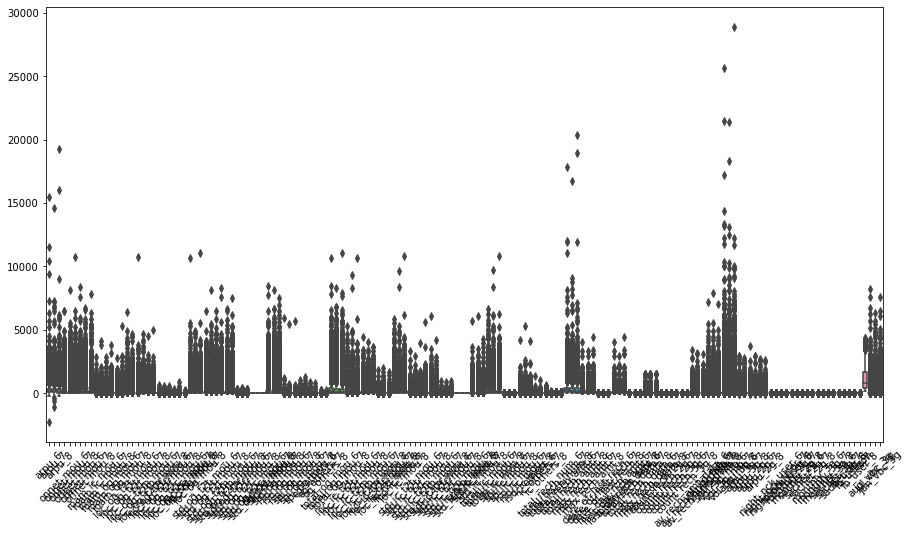

In [31]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train)

In [32]:
#taking care of outliers

def remove_outliers_data(dataframe):
    for col in dataframe.columns:
        #print("fixing outliers for ",col)
        if (((dataframe[col].dtype)=='float64') | ((dataframe[col].dtype)=='int64')):
            percentiles = dataframe[col].quantile([0.05,0.95]).values
            dataframe[col][dataframe[col] <= percentiles[0]] = percentiles[0]
            dataframe[col][dataframe[col] >= percentiles[1]] = percentiles[1]
        else:
            dataframe[col]=dataframe[col]
    return dataframe

X_train_outlier = remove_outliers_data(X_train)

In [33]:
X_test_outlier = remove_outliers_data(X_test)

### Outlier - High Level View (post outlier treatment)

<AxesSubplot:>

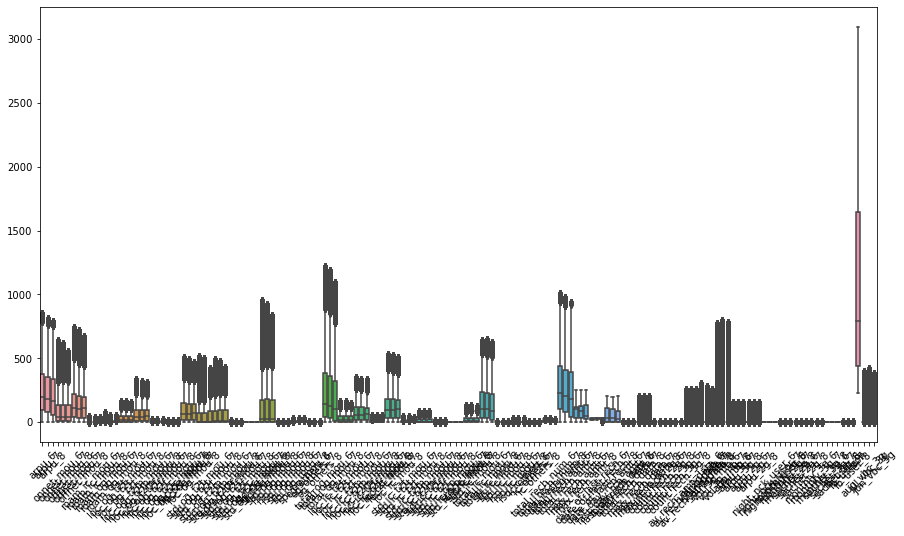

In [34]:
#after fixing outliers boxplot looks much better than before.
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_outlier)

### Important Features using RFE - Logistic Regression

In [35]:
# we will now using RFE for feature reduction

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

In [36]:
# lets RFE select 15 most imp features for us
rfe = RFE(lr, n_features_to_select=15,
    step=1,
    verbose=0,
    importance_getter='auto')   
rfe = rfe.fit(X_train, y_train)

In [37]:
rfe_features = list(X_train.columns[rfe.support_])

### Important features for churn prediction

In [38]:
pd.DataFrame({"Important Features":list(rfe_features)})

,Important Features
0,roam_ic_mou_7
1,roam_ic_mou_8
2,roam_og_mou_8
3,loc_og_t2f_mou_6
4,isd_og_mou_6
5,isd_og_mou_7
6,isd_og_mou_8
7,std_ic_t2t_mou_6
8,std_ic_t2f_mou_8
9,isd_ic_mou_8


In [39]:
X_rfe = pd.DataFrame(data=X_train).iloc[:, rfe.support_]
y_rfe = y_train

#### To check if any of the important features are internally co-related

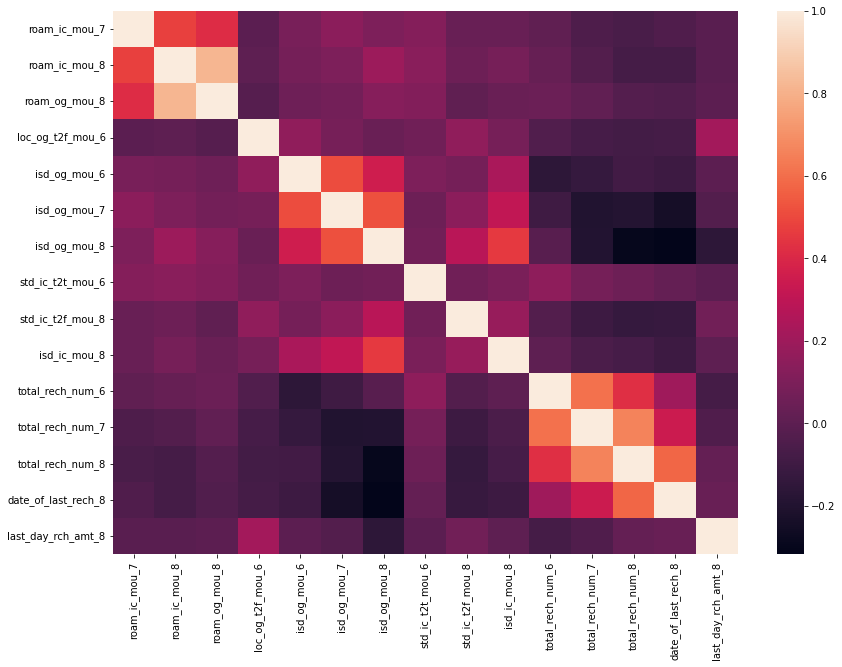

In [40]:
plt.figure(figsize=(14,10))
sns.heatmap(X_rfe.corr())
plt.show()

### Conclusion

- Local Incoming for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are the most important predictor variables to predict churn.
- Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn.
- Local Incoming axnd Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.
- Max Recharge Amount is a strong feature to predict churn.

### Logistic Regression Output
(Using Top Features Only)

In [41]:
# lets create a Logisctic Regression model on the seleted columns by RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [42]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))

[[17873   972]
 [  919  1236]]
Accuracy on the test dataset: 0.909952380952381


In [43]:
# lets check classification report on the test dataset
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18845
           1       0.56      0.57      0.57      2155

    accuracy                           0.91     21000
   macro avg       0.76      0.76      0.76     21000
weighted avg       0.91      0.91      0.91     21000



In [44]:
precision_score(y_test, y_pred)

0.5597826086956522

In [45]:
recall_score(y_test, y_pred)

0.5735498839907193

### Principal Component Analysis (PCA)

Scale the data

In [46]:
### Taking care of scaling for train data
scale = StandardScaler()
X_train_final = scale.fit_transform(X_train_outlier)

In [47]:
### Taking care of scaling for test data
scale = StandardScaler()
X_test_final = scale.fit_transform(X_test_outlier)

In [48]:
X_train_final

array([[-0.89164485, -1.01433306, -0.69387568, ..., -0.33762104,
        -0.33550707, -0.33393954],
       [ 2.53250779,  0.78905027,  1.80569669, ..., -0.33762104,
        -0.33550707, -0.33393954],
       [ 0.00860787, -0.28961411, -0.5514143 , ..., -0.33762104,
        -0.33550707, -0.33393954],
       ...,
       [ 0.9395914 ,  1.43290759, -0.29541504, ..., -0.33762104,
        -0.33550707, -0.33393954],
       [-0.84479491, -0.50705391, -0.88745515, ..., -0.33762104,
        -0.33550707, -0.33393954],
       [-0.52276866, -0.62125795,  0.24206023, ..., -0.33762104,
        -0.33550707, -0.33393954]])

In [49]:
X_test_final

array([[ 2.50763107,  2.50923824,  0.72111813, ..., -0.34978496,
        -0.34250927, -0.33416424],
       [ 1.14859257,  0.67839045,  0.74551365, ...,  0.56786158,
         3.61976614,  3.65746989],
       [ 1.7373616 ,  1.4809228 ,  1.59144254, ..., -0.34978496,
        -0.34250927, -0.33416424],
       ...,
       [-0.11807704,  0.63606648,  1.28429955, ..., -0.34978496,
        -0.34250927, -0.33416424],
       [ 1.3956622 ,  0.31908606,  1.80024549, ..., -0.34978496,
        -0.34250927, -0.33416424],
       [ 0.7429195 ,  1.63882946,  2.21972423, ..., -0.34978496,
        -0.34250927, -0.33416424]])

<AxesSubplot:>

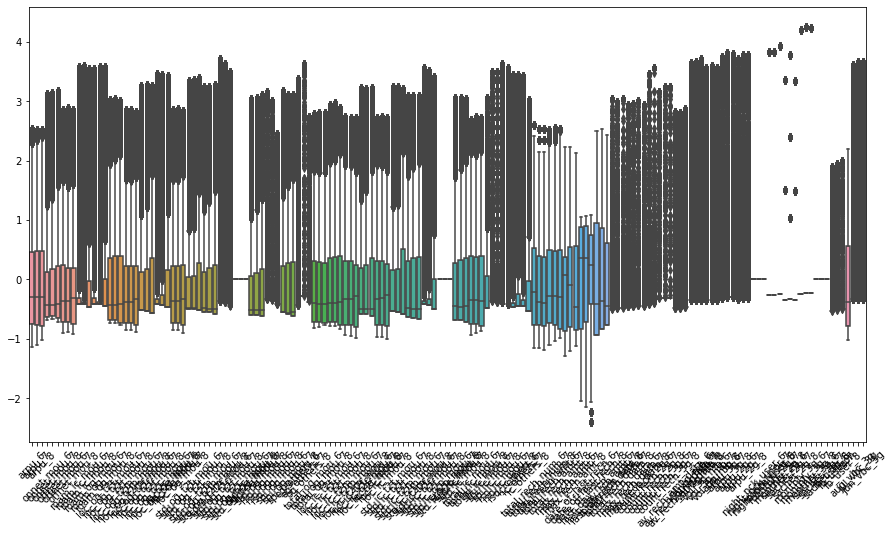

In [50]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_final, columns=X_train_outlier.columns))

<AxesSubplot:>

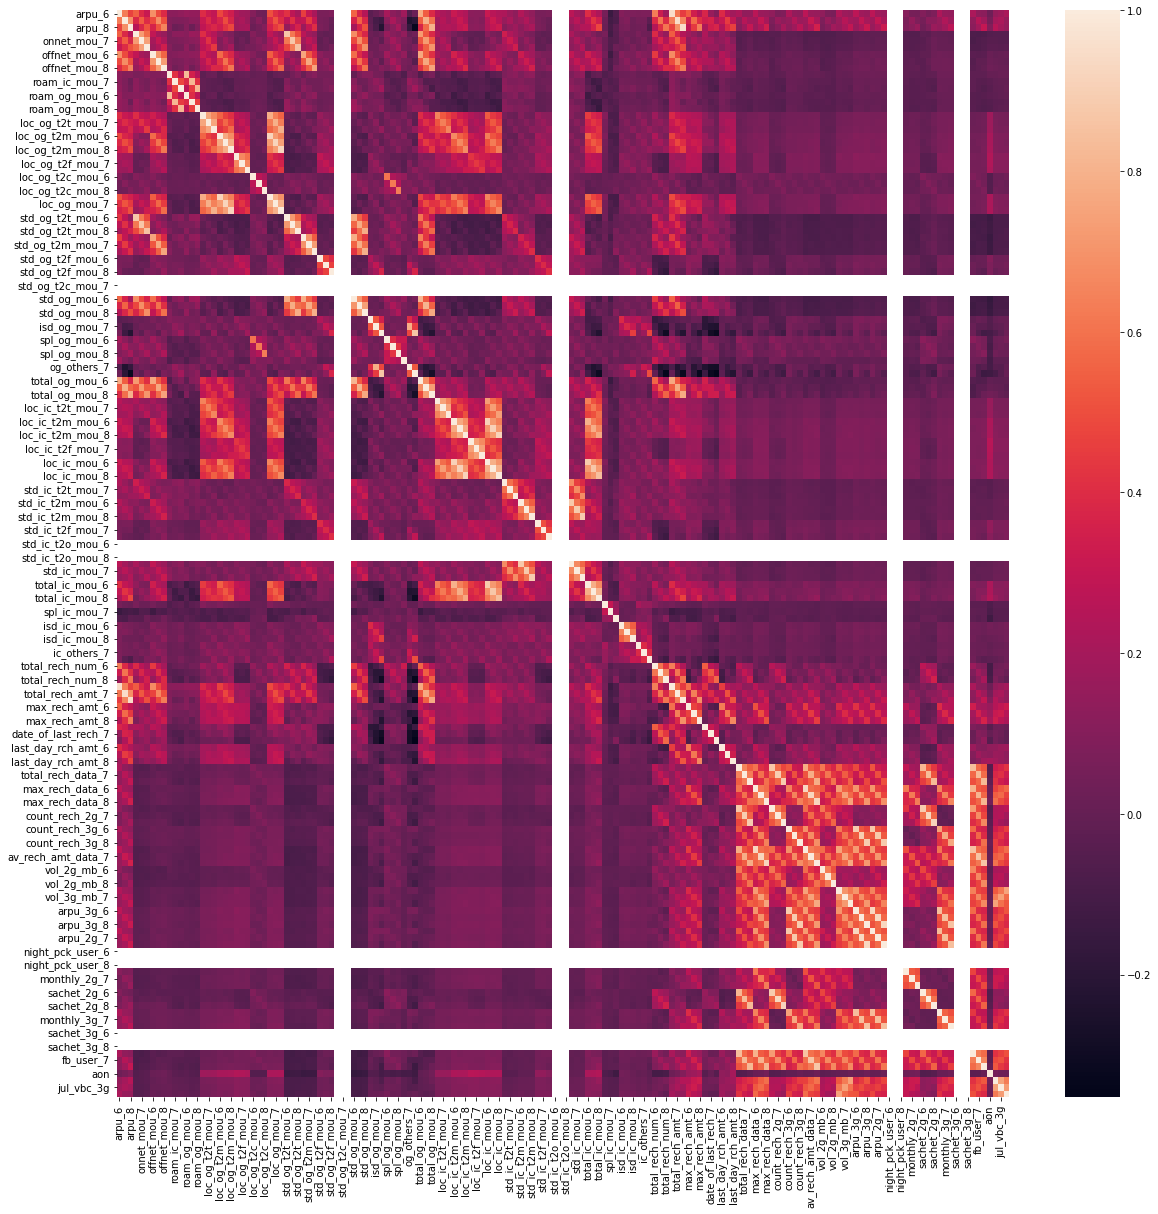

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.DataFrame(X_train_final, columns=X_train_outlier.columns).corr())

<AxesSubplot:xlabel='churn_probability', ylabel='Count'>

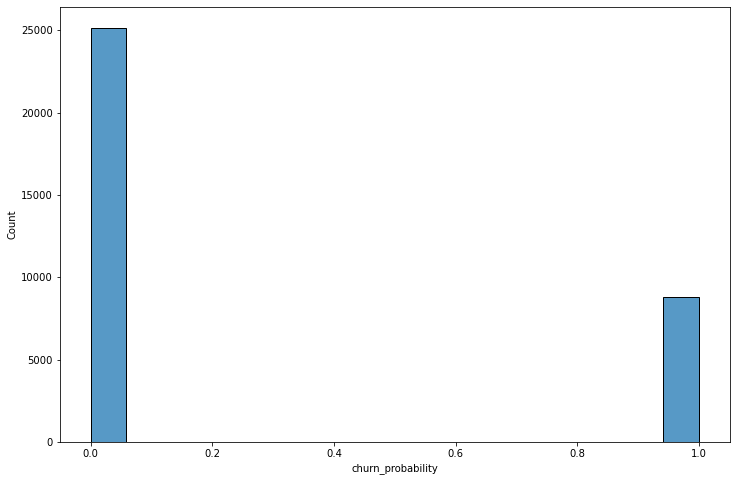

In [52]:
plt.figure(figsize=(12,8))
sns.histplot(y_train)

In [53]:
pca = PCA()
pca_analysis = pca.fit(X_train_final)


In [54]:
#sns.scatterplot(x=pca_analysis[:,0], y=pca_analysis[:,1], hue=y_train)

In [55]:
#sns.scatterplot(x=pca_analysis[:,1], y=pca_analysis[:,2], hue=y_train)

In [56]:
pca_analysis

PCA()

In [57]:
var_cumu = np.cumsum(pca_analysis.explained_variance_ratio_)
var_cumu

array([0.15379535, 0.26466483, 0.33954099, 0.39049567, 0.4297491 ,
       0.46140888, 0.4889695 , 0.51457194, 0.53704395, 0.55788469,
       0.57727268, 0.59529393, 0.61219401, 0.62820814, 0.64262682,
       0.65702829, 0.6702181 , 0.68201464, 0.6936107 , 0.70459856,
       0.71521987, 0.72540304, 0.73485748, 0.74389211, 0.75274744,
       0.76032203, 0.76787626, 0.77514585, 0.78203701, 0.78879745,
       0.7953411 , 0.80174204, 0.80795725, 0.81399541, 0.81978842,
       0.82551058, 0.8311418 , 0.83659451, 0.84192103, 0.84715136,
       0.85223513, 0.85714657, 0.86185782, 0.86628098, 0.8705092 ,
       0.87467791, 0.87869088, 0.88263038, 0.88648536, 0.89021652,
       0.89378565, 0.89719393, 0.90047445, 0.90369293, 0.90684363,
       0.90985331, 0.9128436 , 0.9157936 , 0.91867791, 0.92150568,
       0.92419973, 0.92673743, 0.92921448, 0.93168134, 0.93412742,
       0.93633231, 0.93847896, 0.94054366, 0.94252811, 0.94448915,
       0.94641236, 0.94828413, 0.95009716, 0.95189497, 0.95364

### To arrive at number of PCA components

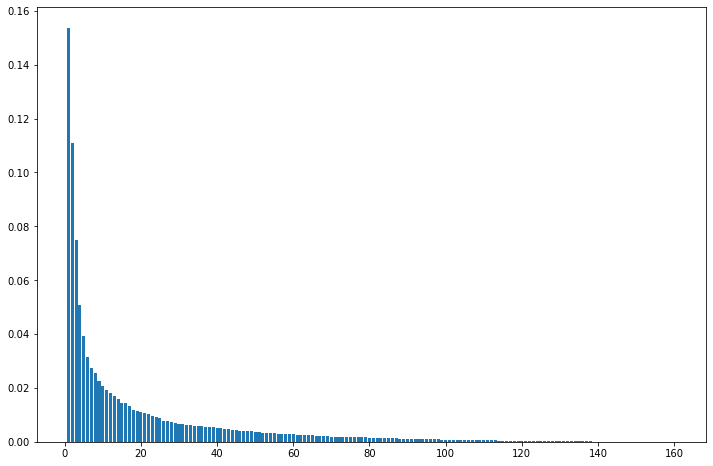

In [58]:
plt.figure(figsize=(12,8))
plt.bar(range(1,len(pca_analysis.explained_variance_ratio_)+1), pca_analysis.explained_variance_ratio_)
plt.show()

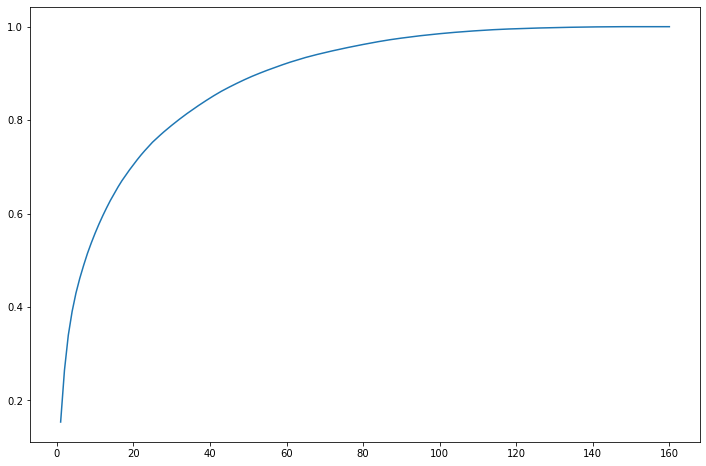

In [59]:
#Scree plot
plt.figure(figsize=(12,8))
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.show()

### AdaBoostClassifer

In [60]:
X_train_final.shape

(33958, 160)

In [61]:
# PCA with 60 components
pca_60 = PCA(n_components=60)

df_tr_pca_60 = pca_60.fit_transform(X_train_final)
print(df_tr_pca_60.shape)

df_test_pca_60 = pca_60.transform(X_test_final)
print(df_test_pca_60.shape)

(33958, 60)
(21000, 60)


In [62]:
y_train.shape

(33958,)

In [63]:
y_test.shape

(21000,)

In [64]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [65]:

#pca = PCA(n_components=60)
#rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_ada = AdaBoostClassifier(n_estimators=200, random_state=1)

#pipe = Pipeline(steps = [('pca',pca),
#                         ('model',rf)])

rf_ada.fit(df_tr_pca_60, y_train)

y_pred_60 = rf_ada.predict(df_test_pca_60)

#train_score = pipe.score(df_tr_pca_40, y_train)
#print("Training accuracy:", train_score)

#test_score = pipe.score(df_tr_pca_40, y_test)
#print("Test accuracy:", test_score)

print('Accuracy: ', accuracy_score(y_test, y_pred_60))
print('\n')

cm_1 = confusion_matrix(y_test,y_pred_60)
print('Confusion Matrix: ', cm_1)
print('\n')

print('Precision Score: ', precision_score(y_test, y_pred_60))
print('\n')

print('Recall Score: ', recall_score(y_test, y_pred_60))

Accuracy:  0.8909523809523809


Confusion Matrix:  [[17068  1777]
 [  513  1642]]


Precision Score:  0.480257385200351


Recall Score:  0.7619489559164733


### RandomForestClassifier

In [66]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [67]:

#pca = PCA(n_components=75)
rf_1 = RandomForestClassifier(n_estimators=500, n_jobs=-1)

#pipe = Pipeline(steps = [('pca',pca),
                        # ('model',rf)])

rf_1.fit(df_tr_pca_60, y_train)

y_pred_60 = rf_1.predict(df_test_pca_60)

print('Accuracy: ', accuracy_score(y_test, y_pred_60))
print('\n')

print('Confusion Matrix: ', confusion_matrix(y_test,y_pred_60))
print('\n')

print('Precision Score: ', precision_score(y_test, y_pred_60))
print('\n')

print('Recall Score: ', recall_score(y_test, y_pred_60))
print('\n')

Accuracy:  0.9307619047619048


Confusion Matrix:  [[18177   668]
 [  786  1369]]


Precision Score:  0.6720667648502701


Recall Score:  0.6352668213457077




### LogisticRegression

In [68]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [69]:
#pca = PCA(n_components=75)
rf_2 = LogisticRegression(max_iter=1000, tol=0.001)

#pipe = Pipeline(steps = [('pca',pca),
#                         ('model',rf)])

rf_2.fit(df_tr_pca_60, y_train)

y_pred_60 = rf_2.predict(df_test_pca_60)

print('Accuracy: ', accuracy_score(y_test, y_pred_60))
print('\n')

print('Confusion Matrix: ', confusion_matrix(y_test,y_pred_60))
print('\n')

#precision_score = precision_score(y_test, y_pred_60)
print('Precision Score: ', precision_score(y_test, y_pred_60))
print('\n')

#recall_score = recall_score(y_test, y_pred_60)
print('Recall Score: ', recall_score(y_test, y_pred_60))

Accuracy:  0.8949523809523809


Confusion Matrix:  [[17124  1721]
 [  485  1670]]


Precision Score:  0.4924800943674432


Recall Score:  0.7749419953596288


In [70]:
rfc=RandomForestClassifier(random_state=42)

param_grid = {
              'max_depth': [5, 10, None], 
              'n_estimators': [100, 250, 500, 750]}

CV_rfc = GridSearchCV(estimator=rfc, 
                      param_grid=param_grid, 
                      cv= 2, return_train_score=True, verbose=1)







In [71]:
CV_rfc.fit(df_tr_pca_60, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [100, 250, 500, 750]},
             return_train_score=True, verbose=1)

In [72]:

CV_rfc.best_params_



{'max_depth': None, 'n_estimators': 750}

In [73]:
y_pred_pca = CV_rfc.predict(df_test_pca_60)

In [74]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred_pca))

Accuracy for Random Forest on CV data:  0.9309047619047619


In [75]:
print('Confusion Matrix: ', confusion_matrix(y_test,y_pred_pca))


print('Precision Score: ', precision_score(y_test, y_pred_pca))

print('Recall Score: ', recall_score(y_test, y_pred_pca))

Confusion Matrix:  [[18188   657]
 [  794  1361]]
Precision Score:  0.6744301288404361
Recall Score:  0.6315545243619489


In [76]:
rfc_best = RandomForestClassifier(n_estimators=750, n_jobs=-1)
rfc_best.fit(df_tr_pca_60, y_train)

RandomForestClassifier(n_estimators=750, n_jobs=-1)

In [77]:
y_pred_pca = rfc_best.predict(df_test_pca_60)

### Best Scores: Accuracy, Precision, Recall.

In [78]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [79]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred_pca))
print('Confusion Matrix: ', confusion_matrix(y_test,y_pred_pca))


print('Precision Score: ', precision_score(y_test, y_pred_pca))

print('Recall Score: ', recall_score(y_test, y_pred_pca))

Accuracy for Random Forest on CV data:  0.9301904761904762
Confusion Matrix:  [[18179   666]
 [  800  1355]]
Precision Score:  0.6704601682335477
Recall Score:  0.62877030162413


In [80]:
test_data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,21,26,24,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1692,0.00,0.00,0.00
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,19,16,24,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2533,0.00,0.00,0.00
2,70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.

In [81]:
test_data.shape

(30000, 161)

In [82]:
test_data['onnet_mou_6'].fillna(value=test_data['onnet_mou_6'].mean(), inplace=True)
test_data['onnet_mou_7'].fillna(value=test_data['onnet_mou_7'].mean(), inplace=True)
test_data['onnet_mou_8'].fillna(value=test_data['onnet_mou_8'].mean(), inplace=True)
test_data['offnet_mou_6'].fillna(value=test_data['offnet_mou_6'].mean(), inplace=True)
test_data['offnet_mou_7'].fillna(value=test_data['offnet_mou_7'].mean(), inplace=True)
test_data['offnet_mou_8'].fillna(value=test_data['offnet_mou_8'].mean(), inplace=True)
test_data['roam_ic_mou_6'].fillna(value=test_data['roam_ic_mou_6'].mean(), inplace=True)
test_data['roam_ic_mou_7'].fillna(value=test_data['roam_ic_mou_7'].mean(), inplace=True)

test_data['roam_ic_mou_8'].fillna(value=test_data['roam_ic_mou_8'].mean(), inplace=True)
test_data['roam_og_mou_6'].fillna(value=test_data['roam_og_mou_6'].mean(), inplace=True)
test_data['roam_og_mou_7'].fillna(value=test_data['roam_og_mou_7'].mean(), inplace=True)
test_data['roam_og_mou_8'].fillna(value=test_data['roam_og_mou_8'].mean(), inplace=True)
test_data['loc_og_t2t_mou_6'].fillna(value=test_data['loc_og_t2t_mou_6'].mean(), inplace=True)
test_data['loc_og_t2t_mou_7'].fillna(value=test_data['loc_og_t2t_mou_7'].mean(), inplace=True)
test_data['loc_og_t2t_mou_8'].fillna(value=test_data['loc_og_t2t_mou_8'].mean(), inplace=True)
test_data['loc_og_t2m_mou_6'].fillna(value=test_data['loc_og_t2m_mou_6'].mean(), inplace=True)
test_data['loc_og_t2m_mou_7'].fillna(value=test_data['loc_og_t2m_mou_7'].mean(), inplace=True)
test_data['loc_og_t2m_mou_8'].fillna(value=test_data['loc_og_t2m_mou_8'].mean(), inplace=True)

test_data['loc_og_t2f_mou_6'].fillna(value=test_data['loc_og_t2f_mou_6'].mean(), inplace=True)
test_data['loc_og_t2f_mou_7'].fillna(value=test_data['loc_og_t2f_mou_7'].mean(), inplace=True)
test_data['loc_og_t2f_mou_8'].fillna(value=test_data['loc_og_t2f_mou_8'].mean(), inplace=True)
test_data['loc_og_t2c_mou_6'].fillna(value=test_data['loc_og_t2c_mou_6'].mean(), inplace=True)
test_data['loc_og_t2c_mou_7'].fillna(value=test_data['loc_og_t2c_mou_7'].mean(), inplace=True)
test_data['loc_og_t2c_mou_8'].fillna(value=test_data['loc_og_t2c_mou_8'].mean(), inplace=True)
test_data['loc_og_mou_6'].fillna(value=test_data['loc_og_mou_6'].mean(), inplace=True)
test_data['loc_og_mou_7'].fillna(value=test_data['loc_og_mou_7'].mean(), inplace=True)
test_data['loc_og_mou_8'].fillna(value=test_data['loc_og_mou_8'].mean(), inplace=True)
test_data['std_og_t2t_mou_6'].fillna(value=test_data['std_og_t2t_mou_6'].mean(), inplace=True)
test_data['std_og_t2t_mou_7'].fillna(value=test_data['std_og_t2t_mou_7'].mean(), inplace=True)
test_data['std_og_t2t_mou_8'].fillna(value=test_data['std_og_t2t_mou_8'].mean(), inplace=True)
test_data['std_og_t2m_mou_6'].fillna(value=test_data['std_og_t2m_mou_6'].mean(), inplace=True)
test_data['std_og_t2m_mou_7'].fillna(value=test_data['std_og_t2m_mou_7'].mean(), inplace=True)

test_data['std_og_t2m_mou_8'].fillna(value=test_data['std_og_t2m_mou_8'].mean(), inplace=True)
test_data['std_og_t2f_mou_6'].fillna(value=test_data['std_og_t2f_mou_6'].mean(), inplace=True)
test_data['std_og_t2f_mou_7'].fillna(value=test_data['std_og_t2f_mou_7'].mean(), inplace=True)
test_data['std_og_t2f_mou_8'].fillna(value=test_data['std_og_t2f_mou_8'].mean(), inplace=True)
test_data['std_og_t2c_mou_6'].fillna(value=test_data['std_og_t2c_mou_6'].mean(), inplace=True)
test_data['std_og_t2c_mou_7'].fillna(value=test_data['std_og_t2c_mou_7'].mean(), inplace=True)
test_data['std_og_t2c_mou_8'].fillna(value=test_data['std_og_t2c_mou_8'].mean(), inplace=True)
test_data['std_og_mou_6'].fillna(value=test_data['std_og_mou_6'].mean(), inplace=True)
test_data['std_og_mou_7'].fillna(value=test_data['std_og_mou_7'].mean(), inplace=True)
test_data['std_og_mou_8'].fillna(value=test_data['std_og_mou_8'].mean(), inplace=True)
test_data['isd_og_mou_6'].fillna(value=test_data['isd_og_mou_6'].mean(), inplace=True)
test_data['isd_og_mou_7'].fillna(value=test_data['isd_og_mou_7'].mean(), inplace=True)
test_data['isd_og_mou_8'].fillna(value=test_data['isd_og_mou_8'].mean(), inplace=True)
test_data['spl_og_mou_6'].fillna(value=test_data['spl_og_mou_6'].mean(), inplace=True)
test_data['spl_og_mou_7'].fillna(value=test_data['spl_og_mou_7'].mean(), inplace=True)
test_data['spl_og_mou_8'].fillna(value=test_data['spl_og_mou_8'].mean(), inplace=True)

test_data['og_others_6'].fillna(value=test_data['og_others_6'].mean(), inplace=True)
test_data['og_others_7'].fillna(value=test_data['og_others_7'].mean(), inplace=True)
test_data['og_others_8'].fillna(value=test_data['og_others_8'].mean(), inplace=True)
test_data['loc_ic_t2t_mou_6'].fillna(value=test_data['loc_ic_t2t_mou_6'].mean(), inplace=True)
test_data['loc_ic_t2t_mou_7'].fillna(value=test_data['loc_ic_t2t_mou_7'].mean(), inplace=True)
test_data['loc_ic_t2t_mou_8'].fillna(value=test_data['loc_ic_t2t_mou_8'].mean(), inplace=True)

test_data['loc_ic_t2m_mou_6'].fillna(value=test_data['loc_ic_t2m_mou_6'].mean(), inplace=True)
test_data['loc_ic_t2m_mou_7'].fillna(value=test_data['loc_ic_t2m_mou_7'].mean(), inplace=True)
test_data['loc_ic_t2m_mou_8'].fillna(value=test_data['loc_ic_t2m_mou_8'].mean(), inplace=True)

test_data['loc_ic_t2f_mou_6'].fillna(value=test_data['loc_ic_t2f_mou_6'].mean(), inplace=True)
test_data['loc_ic_t2f_mou_7'].fillna(value=test_data['loc_ic_t2f_mou_7'].mean(), inplace=True)
test_data['loc_ic_t2f_mou_8'].fillna(value=test_data['loc_ic_t2f_mou_8'].mean(), inplace=True)
test_data['loc_ic_mou_6'].fillna(value=test_data['loc_ic_mou_6'].mean(), inplace=True)
test_data['loc_ic_mou_7'].fillna(value=test_data['loc_ic_mou_7'].mean(), inplace=True)
test_data['loc_ic_mou_8'].fillna(value=test_data['loc_ic_mou_8'].mean(), inplace=True)
test_data['std_ic_t2t_mou_6'].fillna(value=test_data['std_ic_t2t_mou_6'].mean(), inplace=True)
test_data['std_ic_t2t_mou_7'].fillna(value=test_data['std_ic_t2t_mou_7'].mean(), inplace=True)
test_data['std_ic_t2t_mou_8'].fillna(value=test_data['std_ic_t2t_mou_8'].mean(), inplace=True)
test_data['std_ic_t2m_mou_6'].fillna(value=test_data['std_ic_t2m_mou_6'].mean(), inplace=True)
test_data['std_ic_t2m_mou_7'].fillna(value=test_data['std_ic_t2m_mou_7'].mean(), inplace=True)
test_data['std_ic_t2m_mou_8'].fillna(value=test_data['std_ic_t2m_mou_8'].mean(), inplace=True)
test_data['std_ic_t2f_mou_6'].fillna(value=test_data['std_ic_t2f_mou_6'].mean(), inplace=True)
test_data['std_ic_t2f_mou_7'].fillna(value=test_data['std_ic_t2f_mou_7'].mean(), inplace=True)
test_data['std_ic_t2f_mou_8'].fillna(value=test_data['std_ic_t2f_mou_8'].mean(), inplace=True)
test_data['std_ic_t2o_mou_6'].fillna(value=test_data['std_ic_t2o_mou_6'].mean(), inplace=True)
test_data['std_ic_t2o_mou_7'].fillna(value=test_data['std_ic_t2o_mou_7'].mean(), inplace=True)
test_data['std_ic_t2o_mou_8'].fillna(value=test_data['std_ic_t2o_mou_8'].mean(), inplace=True)
test_data['std_ic_mou_6'].fillna(value=test_data['std_ic_mou_6'].mean(), inplace=True)
test_data['std_ic_mou_7'].fillna(value=test_data['std_ic_mou_7'].mean(), inplace=True)
test_data['std_ic_mou_8'].fillna(value=test_data['std_ic_mou_8'].mean(), inplace=True)
test_data['spl_ic_mou_6'].fillna(value=test_data['spl_ic_mou_6'].mean(), inplace=True)
test_data['spl_ic_mou_7'].fillna(value=test_data['spl_ic_mou_7'].mean(), inplace=True)
test_data['spl_ic_mou_8'].fillna(value=test_data['spl_ic_mou_8'].mean(), inplace=True)
test_data['isd_ic_mou_6'].fillna(value=test_data['isd_ic_mou_6'].mean(), inplace=True)
test_data['isd_ic_mou_7'].fillna(value=test_data['isd_ic_mou_7'].mean(), inplace=True)
test_data['isd_ic_mou_8'].fillna(value=test_data['isd_ic_mou_8'].mean(), inplace=True)
test_data['ic_others_6'].fillna(value=test_data['ic_others_6'].mean(), inplace=True)
test_data['ic_others_7'].fillna(value=test_data['ic_others_7'].mean(), inplace=True)
test_data['ic_others_8'].fillna(value=test_data['ic_others_8'].mean(), inplace=True)

In [83]:
test_data.isnull().sum()

id                     0
arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
std_og_t2t_mou_6       0
std_og_t2t_mou_7       0
std_og_t2t_mou_8       0
std_og_t2m_mou_6       0
std_og_t2m_mou_7       0
std_og_t2m_mou_8       0
std_og_t2f_mou_6       0
std_og_t2f_mou_7       0
std_og_t2f_mou_8       0


In [84]:
### Taking care of scaling for train data
scale = StandardScaler()
X_test_unseen = scale.fit_transform(test_data)

In [85]:
X_test_unseen

array([[-1.73199307, -0.60645155, -0.66220616, ..., -0.25929959,
        -0.24734668, -0.24336869],
       [-1.7318776 ,  0.41812613,  0.73085703, ..., -0.25929959,
        -0.24734668, -0.24336869],
       [-1.73176213,  0.15005216,  0.48121593, ...,  1.73575652,
         2.47345839,  0.73934447],
       ...,
       [ 1.73176213, -0.45515526, -0.74605518, ..., -0.25929959,
        -0.24734668, -0.24336869],
       [ 1.7318776 ,  2.67129035,  1.55249383, ..., -0.25929959,
        -0.24734668, -0.24336869],
       [ 1.73199307,  0.11551447,  0.08828892, ...,  2.63510887,
         2.21774053, -0.15088378]])

In [86]:
pca = PCA(n_components=60)
pca.fit_transform(X_test_unseen)

array([[-3.78518364e+00, -1.04620187e+00,  1.00486545e-01, ...,
         1.48870483e-03, -6.26221065e-02,  1.45711451e-01],
       [ 8.11702522e-01,  2.70762405e+00, -2.83415957e+00, ...,
        -3.91964686e-02,  5.57186570e-01,  8.48865868e-03],
       [-7.59100872e-01, -7.43767505e-01,  7.62328856e-01, ...,
         5.94400272e-01,  3.64791494e-02,  1.36460793e-01],
       ...,
       [-3.82028459e+00, -1.26409115e+00,  3.42655962e-01, ...,
        -2.46788757e-02,  2.78533342e-01, -1.30201213e-01],
       [ 1.94692380e+00,  6.35046307e+00,  6.17857524e+00, ...,
        -3.08132475e-01, -1.56105991e-01,  2.92257769e-01],
       [ 1.14319890e+01, -9.76160540e+00,  2.48036244e+00, ...,
        -9.48277193e-01, -1.64379572e+00, -7.46496542e-01]])

In [87]:
pipe = Pipeline(steps = [('pca',pca),
                         ('model',rfc_best)])

In [88]:
test_data['churn_probability'] = pipe.predict(X_test_unseen)

In [89]:
test_data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,69999,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,21,26,24,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1692,0.00,0.00,0.00,0
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,19,16,24,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2533,0.00,0.00,0.00,0
2,70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,

In [90]:
test_output = test_data[['id', 'churn_probability']]

In [91]:
test_output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [92]:
test_output.to_csv('balakumar_roshan_output.csv', index=False)

### Final Performance Metrics

* **Model** - RandomForestClassifier
* **Accuracy** - 0.93
* **Recall** - 0.63
* **Precision** - 0.67

### Conclusion

- Local Incoming for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are the most important predictor variables to predict churn.
- Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn.
- Local Incoming axnd Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.
- Max Recharge Amount is a strong feature to predict churn.

### Notebook ends here!
Author - Balakumar S, Roshan C